In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
\import opendatasets as od
od.download("https://www.kaggle.com/competitions/goodreads-books-reviews-290312/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saitejabandaru
Your Kaggle Key: ··········


100%|██████████| 635M/635M [00:07<00:00, 94.8MB/s]



Extracting archive ./goodreads-books-reviews-290312/goodreads-books-reviews-290312.zip to ./goodreads-books-reviews-290312


In [4]:
import numpy as np
import pandas as pd

In [5]:
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
train_df = pd.read_csv("/content/goodreads-books-reviews-290312/goodreads_train.csv")
test_df = pd.read_csv("/content/goodreads-books-reviews-290312/goodreads_test.csv")

In [7]:
print(len(train_df))

print(len(test_df))
train_df

900000
478033


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0


In [8]:
import random
train_df=train_df[0:100000]
test_df=test_df[0:50000]

<Axes: xlabel='rating', ylabel='count'>

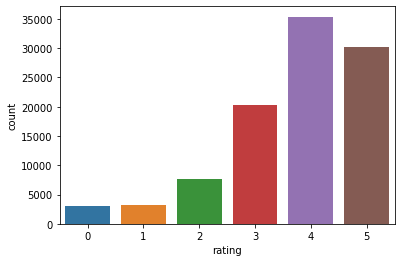

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = train_df.rating)


In [10]:
train_df.isna().sum()

user_id             0
book_id             0
review_id           0
rating              0
review_text         0
date_added          0
date_updated        0
read_at          9448
started_at      32692
n_votes             0
n_comments          0
dtype: int64

In [11]:
test_df.isna().sum()

user_id             0
book_id             0
review_id           0
review_text         0
date_added          0
date_updated        0
read_at          4859
started_at      13773
n_votes             0
n_comments          0
dtype: int64

In [12]:
common_df = pd.concat([train_df.review_text, test_df.review_text]).reset_index(drop = True)
common_df

0         This is a special book. It started slow for ab...
1         Recommended by Don Katz. Avail for free in Dec...
2         A fun, fast paced science fiction thriller. I ...
3         Recommended reading to understand what is goin...
4         I really enjoyed this book, and there is a lot...
                                ...                        
149995                       Cannot wait for the last book!
149996    I cringed everytime she stares at Christian. I...
149997    You will laugh, you will cry, and your heart w...
149998    Wow! Amazing, definitely the best book out of ...
149999                         Absolutely loved the series!
Name: review_text, Length: 150000, dtype: object

In [13]:
# to lower
def to_lower(text):
    return text.lower()

In [14]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
import re
from urllib.parse import urlparse

def remove_url(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r'',text)

print('Example:\n' + common_df[10])

Example:
A beautiful story. Neil Gaiman is truly a unique storyteller. I did a combo of reading and listening to this story, and Neil is great at reading as well. I got interested in this book after seeing the movie, which I really enjoyed. The book is similar - maybe a bit more poetic - but I think the plot in the movie is a bit improved (not much, but a bit). 
 I imagine this book came about because Neil read the below poem that he includes in the beginning, and then he invented a plot around it. The result is the book reads like a epic poem - it's creative, magical, and really, just right. 
 Go and catch a falling star, 
 Get with child a mandrake root, 
 Tell me where all past years are, 
 Or who cleft the devil's foot, 
 Teach me to hear mermaids singing, 
 Or to keep off envy's stinging, 
 And find 
 What wind 
 Serves to advance an honest mind. 
 If thou be'st born to strange sights, 
 Things invisible to see, 
 Ride ten thousand days and nights, 
 Till age snow white hairs on t

In [16]:
import string
remove = string.punctuation

period = '.'
remove = remove.replace(period, '')

def remove_punctuation(text):
    pattern = re.compile(r"[{}]".format(re.escape(remove)))
    
    res = []
    for word in text.split():
        
        # remove all punctiations except periods
        new_word = pattern.sub(r' ', word)
        new_word = new_word.strip(period)
        
        try:
            float(new_word)
        except:
            new_word = new_word.replace(period, ' ')
            
        res.append(new_word)
    
    return ' '.join(res)

In [17]:
# remove all non-alphabetic chars (punctuation, numbers, emojies ...)
def remove_non_alphabetic(text):
    alpha = re.compile(r'[^a-zA-Z]') 
    return alpha.sub(r' ', text)

In [18]:
def remove_quotes(text):
    alpha = re.compile(r'"([^"\\]|\\.)*"') 
    return alpha.sub(r' ', text)

In [19]:
def remove_spoiler_alert(text):
    spoiler = re.compile(r'(\(view spoiler\).*?\(hide spoiler\))') 
    return spoiler.sub(r' ', text)

In [20]:
def remove_small_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

In [21]:
MAX_LEN = 100


In [22]:
def process_text(text):
    text = to_lower(text)
    text = remove_url(text)
    #text = remove_spoiler_alert(text)
    text = remove_quotes(text)
    text = remove_non_alphabetic(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    #text = remove_small_words(text)
    
    # take only first MAX_LEN words
    text = ' '.join(text.split()[:MAX_LEN])
    return text

In [23]:
common_df = common_df.apply(process_text)

# check min number of words
common_df.apply(lambda x : len(x.split())).min()


0

In [24]:
# check if train set has null values 
train = common_df.iloc[:len(train_df)].set_axis(train_df.index)
train_df.loc[train[train == ''].index]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
1136,34216df2a5f3846b17e3f96bea6c2ad7,7818684,ee2b6a6ef25de1ddf311faedfee82357,3,3.5 or 3.75,Sat Sep 19 08:56:14 -0700 2015,Tue Aug 15 14:27:00 -0700 2017,Tue Aug 15 14:27:00 -0700 2017,Sun Aug 13 00:00:00 -0700 2017,1,0
1230,5f550cc8d90df1759eda1496621187d8,10799,9cd415e65c07375d1ca04d3fcded80e4,4,"""I had seen nothing sacred, and the things tha...",Thu Nov 28 23:30:46 -0800 2013,Tue Apr 08 00:35:33 -0700 2014,NaN,NaN,0,0
4803,ed4ecf39b59b9d04ac88cd57566c1135,17334079,1b702b7c86ad6ba19b1bc13b9689089d,2,what is this,Fri Apr 26 22:37:39 -0700 2013,Wed May 08 03:57:21 -0700 2013,Fri Apr 26 00:00:00 -0700 2013,Fri Apr 26 00:00:00 -0700 2013,1,1
7198,951a6001dea709fe3743516b144634ea,62530,f6586d2c532eb99a3059a26da216df4c,5,"""No! That! Is!! Not!!! My!!! Cow!!!!!""",Wed Dec 16 22:53:25 -0800 2015,Wed Dec 16 23:02:07 -0800 2015,Mon May 25 00:00:00 -0700 2015,Mon May 25 00:00:00 -0700 2015,0,0
7447,69f90ac336d51207e11f119dbb3179dc,13337715,8217c287323118d406be9c0b434bf144,5,"""A reader lives a thousand lives before he die...",Wed May 01 12:07:03 -0700 2013,Fri May 10 11:49:47 -0700 2013,Fri May 10 11:49:47 -0700 2013,Wed May 01 00:00:00 -0700 2013,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94857,909e430324d1d07372797a539e9c114f,15736709,f2208998c7117b43a0f69ab6a26968f7,2,This just wasn't for me.,Thu Sep 17 04:59:58 -0700 2015,Sat Jan 09 07:48:10 -0800 2016,Sat Jan 09 07:48:10 -0800 2016,Fri Jan 08 00:00:00 -0800 2016,0,0
96333,1fd99c8fcc3a5ac2dca745daf4f28d70,10507293,8974a08d8b61896cf35dd250a46e4b82,1,That was just... no.,Fri Jan 30 03:28:26 -0800 2015,Sat Jan 31 14:00:26 -0800 2015,Sat Jan 31 15:44:48 -0800 2015,Fri Jan 30 00:00:00 -0800 2015,4,6
96405,1fd99c8fcc3a5ac2dca745daf4f28d70,41865,aa841b9d74a8c15152a7acf3ea3c39be,1,"""He still had my chin -- his fingers holding t...",Fri Jan 04 08:27:09 -0800 2013,Mon Apr 13 13:00:15 -0700 2015,NaN,NaN,13,5
96407,1fd99c8fcc3a5ac2dca745daf4f28d70,7261699,576e7c0b6a9aec5e39ff7986de890fe1,4,"""You are wrong when you say there is no power ...",Tue Jan 01 03:01:21 -0800 2013,Sat Feb 09 03:54:42 -0800 2013,Fri Feb 08 00:00:00 -0800 2013,NaN,2,0


In [25]:
# check if text set has null values 
test = common_df.iloc[-len(test_df):].set_axis(test_df.index)
test_df.loc[test[test == ''].index]

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
9403,3eb8ce35cf067c802f072fea8c313067,28597587,b534c9ec2e6c5a2e03ce1bbddbcf7dbc,About 3.5,Fri Oct 14 23:21:02 -0700 2016,Mon Sep 18 08:44:24 -0700 2017,Sat Oct 15 23:21:40 -0700 2016,Sat Oct 15 00:00:00 -0700 2016,0,0
9455,b8ae0af5695c263f3c66868ceec4f8e2,24179216,52f2cf514d81183e1100829a73fd3775,2.5*'s from me.,Mon Oct 05 13:24:06 -0700 2015,Sun Jan 15 12:43:21 -0800 2017,Fri Feb 19 06:27:02 -0800 2016,Wed Feb 03 00:00:00 -0800 2016,0,0
10223,59272f14be7a09999905d4fa9c98cae7,7260188,6cbd479e65945663488650fb9315850c,"""The damage, the fatigue, the imperfections. T...",Mon May 23 11:04:38 -0700 2011,Sun May 26 02:09:43 -0700 2013,Mon May 23 00:00:00 -0700 2011,Mon May 23 00:00:00 -0700 2011,0,0
10224,59272f14be7a09999905d4fa9c98cae7,6148028,73c04addd52ba860f0c91cc5d6dc8ce4,"""I didn't even know I was crushing it, but I g...",Thu May 19 14:40:21 -0700 2011,Sun May 26 02:09:53 -0700 2013,Fri May 20 00:00:00 -0700 2011,Thu May 19 00:00:00 -0700 2011,0,0
10710,55de53160394d36f820e2772c542bdc4,10818853,ff988c75a9afcd90f10eaf02574e34dd,...why.,Mon Jul 09 22:38:07 -0700 2012,Thu Oct 27 23:08:09 -0700 2016,Fri Jul 13 09:45:11 -0700 2012,Mon Jul 09 00:00:00 -0700 2012,0,0
...,...,...,...,...,...,...,...,...,...,...
43661,01ac61df8755dfef908abfe8205c3366,12341309,3b3124617a61af405edfa53ea1fa9a07,This just wasn't for me.,Fri Dec 28 14:40:13 -0800 2012,Sat Jan 12 17:28:37 -0800 2013,NaN,NaN,0,0
44384,9dbfb7edcb77f9759b83c36ab239a33b,16130549,f631cb522628d39025cead8b77926fee,"""He knew better, even then (he was possessed o...",Sat Mar 16 05:21:12 -0700 2013,Sat Oct 05 11:15:08 -0700 2013,Sat Oct 05 11:15:08 -0700 2013,Fri Sep 27 00:00:00 -0700 2013,1,0
46731,ff08c9f9be73017f38716368bdb9e202,7098304,9f19acde42a7fd2f86b13523b60362f8,More of the same...,Tue Jan 29 21:06:20 -0800 2013,Fri May 06 10:33:30 -0700 2016,Fri Jan 25 00:00:00 -0800 2013,NaN,0,0
46751,ff08c9f9be73017f38716368bdb9e202,16075836,0dc47fc6cc5bc709e4dbf6c5b152766c,"""That's the whole point of life. To love someo...",Sun Jan 06 23:12:25 -0800 2013,Sat Feb 25 12:43:20 -0800 2017,Sat Feb 25 12:43:20 -0800 2017,Mon Feb 06 00:00:00 -0800 2017,0,0


LEMETIZATION


In [26]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    return ' '.join(wordnet_lemmatizer.lemmatize(word) for word in text.split()) # all words are considered as noun

In [27]:
import nltk
nltk.download('wordnet')
common_df = common_df.apply(lemmatization)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [28]:
common_df[10]


'beautiful story neil gaiman truly unique storyteller combo reading listening story neil great reading well got interested book seeing movie really enjoyed book similar maybe bit poetic think plot movie bit improved much bit imagine book came neil read poem includes beginning invented plot around result book read like epic poem creative magical really right go catch falling star get child mandrake root tell past year cleft devil foot teach hear mermaid singing keep envy stinging find wind serf advance honest mind thou st born strange sight thing invisible see ride ten thousand day night till age snow white hair'

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

y = to_categorical(train_df['rating'])
y.shape


(100000, 6)

In [30]:
train_df['rating'].unique()

array([5, 3, 0, 4, 2, 1])

SPLIT DATASET INTO TRAIN AND TEST

In [31]:
X = common_df.iloc[:y.shape[0]]
X_test = common_df.iloc[y.shape[0]:]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 42)


In [33]:
X_train.head()

71584    ever want life kate bishop clint barton gettin...
98962    wow story really grew first rolled eye sighed ...
74509    always interesting go back read original sourc...
86798    book lately cant seem find one keep started st...
54930    got star amazing expect plot twist loved paul ...
Name: review_text, dtype: object

In [34]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

LSTM


In [35]:
#tokensization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # fit tokenizer only on train data

vocab_size = len(tokenizer.word_index)
vocab_size

65747

In [37]:
train_sequence = tokenizer.texts_to_sequences(X_train)
train_sequence = pad_sequences(train_sequence, maxlen = MAX_LEN, padding = 'post')

val_sequence = tokenizer.texts_to_sequences(X_val)
val_sequence = pad_sequences(val_sequence, maxlen = MAX_LEN, padding = 'post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence = pad_sequences(test_sequence, maxlen = MAX_LEN, padding = 'post')

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SpatialDropout1D, LSTM, Embedding

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [40]:
early_stop = EarlyStopping(patience = 4, restore_best_weights = True, verbose = 1) # val_loss
reduce_lr = ReduceLROnPlateau(factor = 0.1, patience = 2, mode = 'min', verbose = 1) # val_loss

In [41]:
model=Sequential()
model.add(Embedding(vocab_size + 1, 50, input_length = MAX_LEN))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           3287400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 3,348,406
Trainable params: 3,348,406
Non-trainable params: 0
_________________________________________________________________


In [43]:
# fit the model
history = model.fit(train_sequence, 
                    y_train, 
                    batch_size = 64,
                    epochs = 7,
                    verbose = 1,
                    validation_data = (val_sequence, y_val),
                    callbacks = [reduce_lr, early_stop])

Epoch 1/7
1329/1329 [==============================] - 426s 321ms/step - loss: 1.3220 - accuracy: 0.4243 - val_loss: 1.3458 - val_accuracy: 0.3907 - lr: 0.0010
Epoch 2/7
1329/1329 [==============================] - 421s 317ms/step - loss: 1.2075 - accuracy: 0.4892 - val_loss: 1.2435 - val_accuracy: 0.4724 - lr: 0.0010
Epoch 3/7
1329/1329 [==============================] - 419s 315ms/step - loss: 1.1132 - accuracy: 0.5388 - val_loss: 1.2441 - val_accuracy: 0.4776 - lr: 0.0010
Epoch 4/7
1329/1329 [==============================] - 420s 316ms/step - loss: 1.0462 - accuracy: 0.5729 - val_loss: 1.2375 - val_accuracy: 0.4869 - lr: 0.0010
Epoch 5/7
1329/1329 [==============================] - 416s 313ms/step - loss: 0.9578 - accuracy: 0.6125 - val_loss: 1.2548 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 6/7
1329/1329 [==============================] - ETA: 0s - loss: 0.8782 - accuracy: 0.6513
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1329/1329 [===============

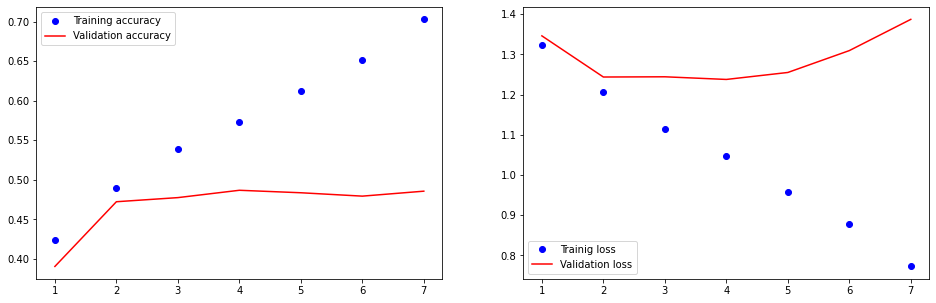

In [44]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)
plt.title("LSTM Model Results")
plt.figure(figsize=(16, 5))
#accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend()

#loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Trainig loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

plt.show()

In [45]:
sub = pd.DataFrame()
sub['review_text'] = test_df.review_text
sub['rating'] = [np.argmax(i) for i in model.predict(test_sequence)]
sub.head()

1563/1563 [==============================] - 61s 39ms/step


,review_text,rating
0,** spoiler alert ** \n This is definitely one ...,4
1,"** spoiler alert ** \n ""You are what you drink...",3
2,Roar is one of my favorite characters in Under...,4
3,** spoiler alert ** \n If you feel like travel...,3
4,3.5 stars \n I read and enjoyed the first two ...,4


In [46]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam , Adagrad, SGD, RMSprop
from keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN, Activation, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

SIMPLE RNN


In [47]:
model2=Sequential()
model2.add(Embedding(vocab_size + 1, 50, input_length = MAX_LEN))
model2.add(SpatialDropout1D(0.2))
model2.add(SimpleRNN(100,dropout=0.2,recurrent_dropout=0.2))
model2.add(Dense(6,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           3287400   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 50)          0         
 lDropout1D)                                                     
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               15100     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 3,303,106
Trainable params: 3,303,106
Non-trainable params: 0
_________________________________________________________________


In [48]:
# fit the model
history1 = model2.fit(train_sequence, 
                    y_train, 
                    batch_size = 64,
                    epochs = 5,
                    verbose = 1,
                    validation_data = (val_sequence, y_val),
                    callbacks = [reduce_lr, early_stop])

Epoch 1/5
1329/1329 [==============================] - 151s 112ms/step - loss: 1.4983 - accuracy: 0.3353 - val_loss: 1.4786 - val_accuracy: 0.3513 - lr: 0.0010
Epoch 2/5
1329/1329 [==============================] - 148s 111ms/step - loss: 1.4722 - accuracy: 0.3445 - val_loss: 1.4693 - val_accuracy: 0.3513 - lr: 0.0010
Epoch 3/5
1329/1329 [==============================] - 145s 109ms/step - loss: 1.4625 - accuracy: 0.3562 - val_loss: 1.4752 - val_accuracy: 0.3104 - lr: 0.0010
Epoch 4/5
1329/1329 [==============================] - ETA: 0s - loss: 1.4289 - accuracy: 0.3812
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1329/1329 [==============================] - 145s 109ms/step - loss: 1.4289 - accuracy: 0.3812 - val_loss: 1.4763 - val_accuracy: 0.3434 - lr: 0.0010
Epoch 5/5
1329/1329 [==============================] - 145s 109ms/step - loss: 1.3573 - accuracy: 0.4205 - val_loss: 1.4630 - val_accuracy: 0.3538 - lr: 1.0000e-04


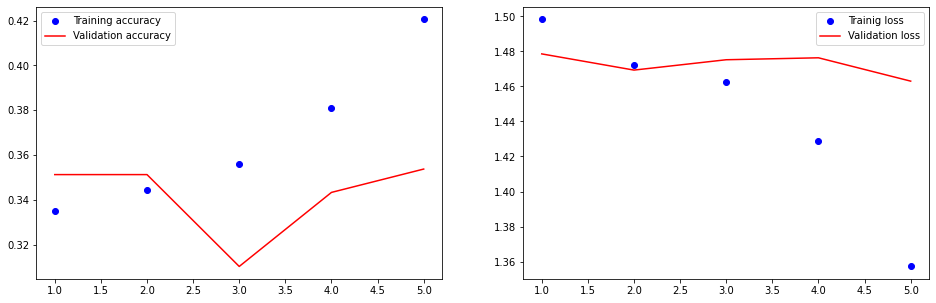

In [51]:
loss = history1.history['loss']
acc = history1.history['accuracy']
val_loss = history1.history['val_loss']
val_acc = history1.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 5))
#accuracy
plt.title("SimpleRNN Model Results")
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend()

#loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Trainig loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

plt.show()

BIDIRECTIONAL LSTM

In [49]:
model3=Sequential()
model3.add(Embedding(vocab_size + 1, 50, input_length = MAX_LEN))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(100,dropout=0.2,recurrent_dropout=0.2)))
model3.add(Dense(6,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           3287400   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 50)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 3,409,406
Trainable params: 3,409,406
Non-trainable params: 0
_________________________________________________________________


In [52]:
# fit the model
history3 = model3.fit(train_sequence, 
                    y_train, 
                    batch_size = 64,
                    epochs = 5,
                    verbose = 1,
                    validation_data = (val_sequence, y_val),
                    callbacks = [reduce_lr, early_stop])

Epoch 1/5
1329/1329 [==============================] - 783s 589ms/step - loss: 1.0831 - accuracy: 0.5414 - val_loss: 1.1607 - val_accuracy: 0.5033 - lr: 0.0010
Epoch 2/5
1329/1329 [==============================] - 804s 605ms/step - loss: 0.9899 - accuracy: 0.5893 - val_loss: 1.1662 - val_accuracy: 0.5016 - lr: 0.0010
Epoch 3/5
1329/1329 [==============================] - ETA: 0s - loss: 0.9097 - accuracy: 0.6303
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1329/1329 [==============================] - 777s 585ms/step - loss: 0.9097 - accuracy: 0.6303 - val_loss: 1.2417 - val_accuracy: 0.5023 - lr: 0.0010
Epoch 4/5
1329/1329 [==============================] - 784s 590ms/step - loss: 0.7621 - accuracy: 0.7042 - val_loss: 1.3067 - val_accuracy: 0.4987 - lr: 1.0000e-04
Epoch 5/5
1329/1329 [==============================] - ETA: 0s - loss: 0.7354 - accuracy: 0.7155
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Restoring model we

<ipython-input-53-27f9af4b15f4>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


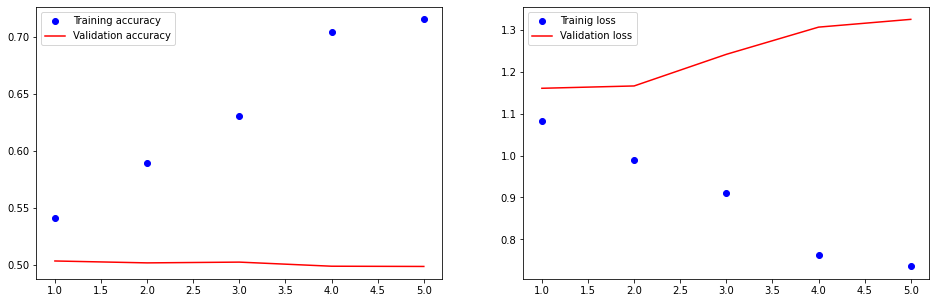

In [53]:
loss = history3.history['loss']
acc = history3.history['accuracy']
val_loss = history3.history['val_loss']
val_acc = history3.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 5))
#accuracy

plt.title("Bidirectional LSTM Model Results")
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend()

#loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Trainig loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

plt.show()